In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [635]:
df = pd.read_csv("../../datasets/fractions/data/Dyad_16Participant_6_Fixations.csv")
cscw_name_mapping = {
            "id": "subject_id",
            "Fixation Start [ms]": "time",
            "Position X": "x",
            "Position Y": "y",
            "Average Pupil Size [px] X": "pupil_diameter",
            "Fixation Duration [ms]": "duration",
            "Fixation End [ms]": "fixation_end",
        }
fractions_name_mapping = {
            "id": "subject_id",
            "start": "time",
            "x": "x",
            "y": "y",
            "Avg_Pupil_Size_X": "pupil_diameter",
            "duration": "duration",
            "end": "fixation_end",
        }
a = df.rename(columns=fractions_name_mapping)

In [724]:

def get_saccade_length(data):
    coordinates = data.loc[:, ["x", "y"]].to_numpy()
    shifted_coordinates = np.roll(coordinates, -1, axis=0).tolist()
    shifted_coordinates[-1] = coordinates[-1]
    return pd.Series([np.linalg.norm(a - b) for a, b in zip(coordinates, shifted_coordinates)])


def get_saccade_duration(data):
    endtimes = data.loc[:, "fixation_end"].to_numpy()
    starttimes = data.loc[:, "time"].to_numpy()
    shifted_starttimes = np.roll(starttimes, -1, axis=0).tolist()
    shifted_starttimes[-1] = starttimes[-1]
    return pd.Series(shifted_starttimes - endtimes)


def get_angle_of_saccades(data):
    coordinates = data.loc[:, ["x", "y"]].to_numpy()
    shifted_coordinates = np.roll(coordinates, -1, axis=0).tolist()
    shifted_coordinates[-1] = coordinates[-1]  # dette funker ikke må settes
    return [
        angle_between_coordinates(a, b)
        for a, b in zip(coordinates, shifted_coordinates)
    ]


def angle_between_coordinates(a, b):
    radians = math.atan2(b[1] - a[1], b[0] - a[0])
    return abs(radians)


def normalize_trials(df):
    # Since we combine the trials and only look at sections where they are reading code, it is a huge gap in time in the middle
    trial_1_endtime = df.loc[df["trial_number"] == 1, "fixationEnd"].iloc[-1]
    trial_2_starttime = df.loc[df["trial_number"] == 2, "fixationStart"].iloc[0]
    diff = trial_2_starttime - trial_1_endtime
    df.loc[df["trial_number"] == 2, "fixationStart"] -= diff
    df.loc[df["trial_number"] == 2, "fixationEnd"] -= diff
    return df

def normalize_time(df):

    min_time = df["time"].min()
    df["time"] = df["time"] - min_time
    df["fixation_end"] = df["fixation_end"] - min_time
    #df = fix_outliers_in_time(df)
    return df


def fix_outliers_in_time(df):
    saccade_durations = get_saccade_length(df)
    saccade_durations.index = df.index
    median_duration = saccade_durations.mean()
    threshold = np.percentile(saccade_durations, 65)
    print(threshold, "threshold")
    
    
    bool_series = saccade_durations > threshold
    indices = df[bool_series].index
    print(saccade_durations)
    for i in indices:
        print(i)
        next_index = df.index.get_loc(i) + 1
        diff2 = df.loc[:,"time"].iloc[i+1]- df.loc[i, "fixation_end"]
        diff = saccade_durations[i]
        print(diff2, "diff2")
        print(diff, "diff1")
        df.loc[i+1:,"time"] -= diff2 #- median_duration
        df.loc[i+1:,"fixation_end"] -= diff2 #- median_duration
    return df
    
    



In [725]:

#df["time"] = df["time"]/1000
#df["fixation_end"] = df["fixation_end"]/1000


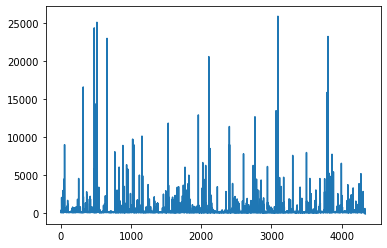

2137956 diff1
3008
67.7470000050962 diff2
316.93089846210955 diff1
3010
47.96499999985099 diff2
307.2286160174534 diff1
3011
46.369000002741814 diff2
178.78960400425942 diff1
3012
64.57699999958277 diff2
153.28092444919562 diff1
3015
39.9919999986887 diff2
199.30355666670874 diff1
3018
135.86299999803305 diff2
322.35214812375614 diff1
3021
55.97800000011921 diff2
303.8938263604577 diff1
3022
56.08500000461936 diff2
376.58277629227814 diff1
3023
36.0409999974072 diff2
169.57806727286382 diff1
3024
39.994000002741814 diff2
143.9391055273025 diff1
3025
43.53099999949336 diff2
375.78963011238085 diff1
3034
63.39800000190735 diff2
317.63491558706204 diff1
3036
39.02600000053644 diff2
139.78678943305053 diff1
3041
40.10799999907613 diff2
130.04682425957228 diff1
3043
808.1279999986291 diff2
230.8311010241038 diff1
3046
112.00300000235438 diff2
284.74655748577544 diff1
3048
47.99599999934435 diff2
322.65337097262756 diff1
3049
47.95700000226498 diff2
196.5940601849405 diff1
3050
55.9930000007

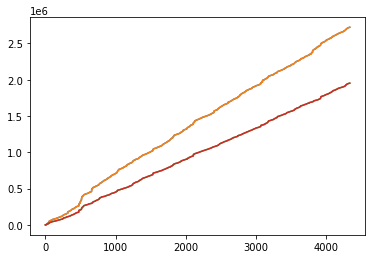

In [726]:
df = a
df = df[df["Event_Type"] == "Fixation L"]
df = df.reset_index()
plt.plot(get_saccade_duration(df))
plt.show()
df = normalize_time(df)
plt.plot(df["time"])
plt.plot(df["fixation_end"].shift(1))
df = fix_outliers_in_time(df)
plt.plot(df["time"])
plt.plot(df["fixation_end"].shift(1))
plt.show()
# cscw/data/Inchgower_1_1_VideoFixations_Details.csv

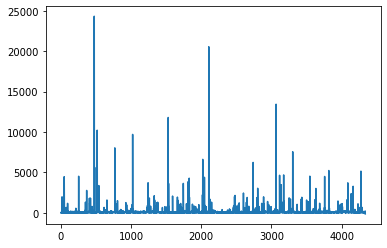

In [727]:
plt.plot(get_saccade_duration(df))
plt.show()

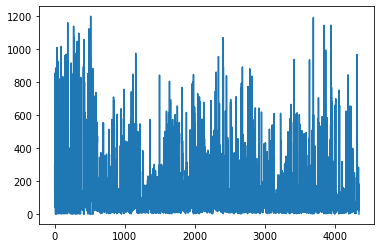

In [326]:
plt.plot(get_saccade_length(df))
plt.show()

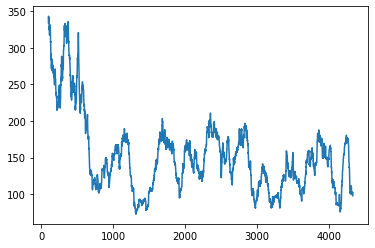

In [8]:
plt.plot(get_saccade_length(df).rolling(100).mean())
plt.show()

In [9]:
normalized_df = df/calibration_avg
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

NameError: name 'calibration_avg' is not defined

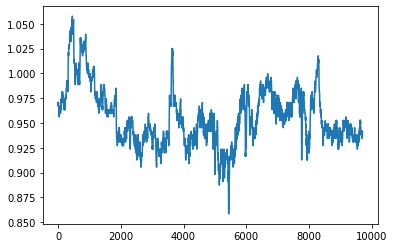

In [108]:
avg_first_30 = df.iloc[0:750, 0].mean()
normalized_df = df/avg_first_30
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

In [83]:
avg_first_30

4629    2.88
4630    2.88
4631    2.88
4632    2.88
4633    2.88
        ... 
5405    3.01
5406    3.00
5407    2.99
5408    2.98
5409    2.98
Name: L Mapped Diameter [mm], Length: 750, dtype: float64